# 数据准备

## 连续区间

In [6]:
import numpy as np
import pandas as pd
from utils import *
from ngboost.learners import *

输出连续区间

In [2]:
path = '/Users/apple/Documents/ML_Project/ML - 2.1/Data/国际西班牙数据.csv'
data = load_data(path, add_time=True, describe=False)

index = data[data['wind_speed'].isna() |
    data['wind_direction'].isna() |
    data['wind_power'].isna()]['wind_power'].index.tolist()
a = index[0]
b=-1
for i,x in enumerate(index):
    if i<len(index)-1:
        if index[i+1] > index[i]+1:
            print('Continue: [',b+1, ',', a-1,']','len:',a-b-2,
                '\tNan: [',a, ',',index[i], '] len:',index[i]-a+1)     
            a = index[i+1]
            b = index[i]
    else: 
        a=index[-15]
        print('Continue: [',b+1, ',', a-1,']','len:',a-b-2,
                '\tNan: [',a, ',',index[i], '] len:',index[i]-a+1)     
        a=len(data)
        b=index[i]
        print('Continue: [',b+1, ',', a-1,']','len:',a-b-2)

del data

Continue: [ 0 , 975 ] len: 975 	Nan: [ 976 , 976 ] len: 1
Continue: [ 977 , 2216 ] len: 1239 	Nan: [ 2217 , 2221 ] len: 5
Continue: [ 2222 , 3498 ] len: 1276 	Nan: [ 3499 , 3560 ] len: 62
Continue: [ 3561 , 3572 ] len: 11 	Nan: [ 3573 , 3589 ] len: 17
Continue: [ 3590 , 4314 ] len: 724 	Nan: [ 4315 , 4401 ] len: 87
Continue: [ 4402 , 6255 ] len: 1853 	Nan: [ 6256 , 6273 ] len: 18
Continue: [ 6274 , 6375 ] len: 101 	Nan: [ 6376 , 6376 ] len: 1
Continue: [ 6377 , 6417 ] len: 40 	Nan: [ 6418 , 6425 ] len: 8
Continue: [ 6426 , 10427 ] len: 4001 	Nan: [ 10428 , 10447 ] len: 20
Continue: [ 10448 , 13432 ] len: 2984 	Nan: [ 13433 , 13434 ] len: 2
Continue: [ 13435 , 13976 ] len: 541 	Nan: [ 13977 , 13985 ] len: 9
Continue: [ 13986 , 14000 ] len: 14 	Nan: [ 14001 , 14009 ] len: 9
Continue: [ 14010 , 14024 ] len: 14 	Nan: [ 14025 , 14033 ] len: 9
Continue: [ 14034 , 14048 ] len: 14 	Nan: [ 14049 , 14057 ] len: 9
Continue: [ 14058 , 14072 ] len: 14 	Nan: [ 14073 , 14077 ] len: 5
Continue: [ 1407

## 可视化

In [3]:
%config InlineBackend.figure_format='retina'
from tqdm.notebook import tqdm as tqdm
for day in tqdm(np.arange(1,2)):
    plot_module1(year=2017, month=10, day=day, figsize=(8,13), 
                 save_fig=False, close_fig=True)
for day in tqdm(np.arange(1,2)):
    plot_module2(year=2017, month=10, day=day, figsize=(8,10), 
                 save_fig=False, close_fig=True)

# 模型预测

In [1]:
import numpy as np
import pandas as pd
from module.utils import *
from ngboost.learners import *
%config InlineBackend.figure_format='retina'

In [2]:
transform=None
X_train, X_test, Y_train, Y_test = get_data(hour_num=3, transform=transform,
                                            drop_time=True, scale=True)
Pred_df = Y_test

get_data(hour_num=3, transform='None', drop_time=True, scale=True)

Input space:  Index(['wind_speed', 'wind_direction', 'wind_speed-1', 'wind_speed-2',
       'wind_speed-3', 'wind_direction-1', 'wind_direction-2',
       'wind_direction-3', 'wind_power-1', 'wind_power-2', 'wind_power-3'],
      dtype='object')


## default_linear_learner

NGBRegressor(Base=Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                        max_iter=None, normalize=False, random_state=None,
                        solver='auto', tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0536 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.3438 val_loss=0.0000 scale=0.1250 norm=0.0571
[iter 200] loss=-0.3694 val_loss=0.0000 scale=0.0312 norm=0.0139
[iter 300] loss=-0.3710 val_loss=0.0000 scale=0.0078 norm=0.0034
[iter 400] loss=-0.3711 val_loss=0.0000 scale=0.0020 norm=0.0009

Test MSE 0.03700262671904601
Test NLL -0.2981769482187339


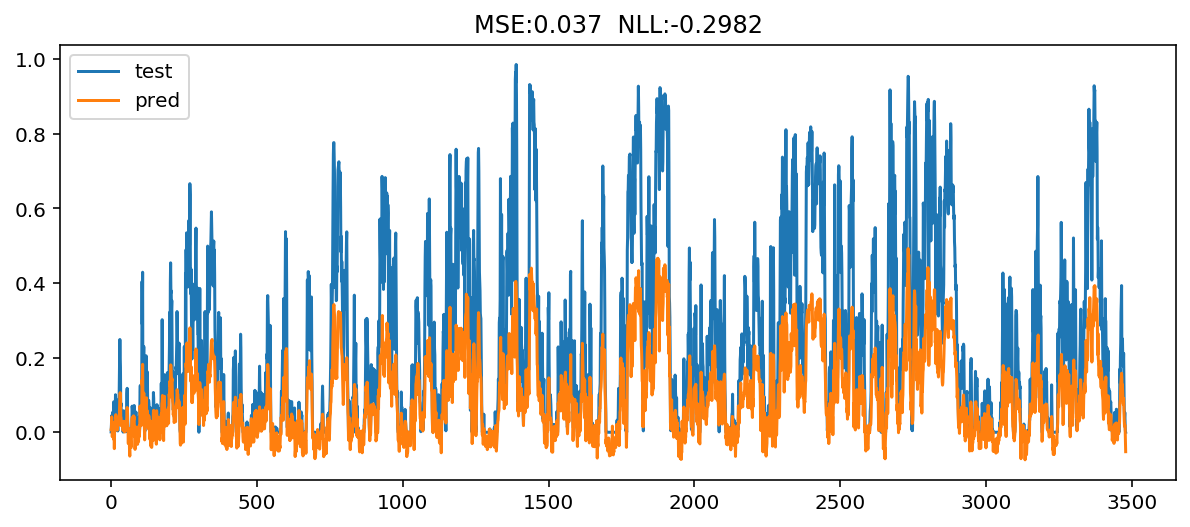

In [3]:
Y_pred = model_test(Base=default_linear_learner(alpha=0.1),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=100,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'default_linear_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## default_tree_learner

NGBRegressor(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=1000, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=200) 

[iter 0] loss=0.0536 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 200] loss=-0.3027 val_loss=0.0000 scale=0.1250 norm=0.0481
[iter 400] loss=-0.3135 val_loss=0.000

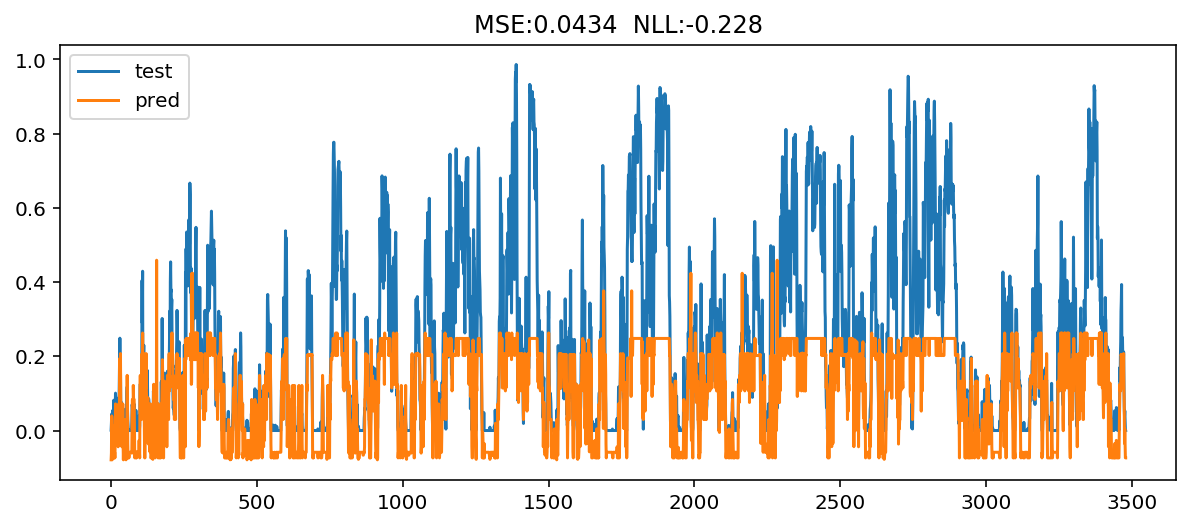

In [4]:
Y_pred = model_test(Base=default_tree_learner(depth=6),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=1000, verbose_eval=200,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'default_tree_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## lasso_learner

NGBRegressor(Base=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                        max_iter=1000, normalize=False, positive=False,
                        precompute=False, random_state=None, selection='cyclic',
                        tol=0.0001, warm_start=False),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.1430 val_loss=0.0000 scale=0.2500 norm=0.6105
[iter 100] loss=0.0922 val_loss=0.0000 scale=0.0156 norm=0.0470
[iter 200] loss=0.0897 val_loss=0.0000 scale=0.0039 norm=0.0121
[iter 300] loss=0.0896 val_loss=0.0000 scale=0.0010 norm=0.0030
[iter 400] loss=0.0895 val_loss=0.0000 scale=0.0002 norm=0.0008

Test MSE 0.03137745895624452
Test NLL -0.33521301343449406


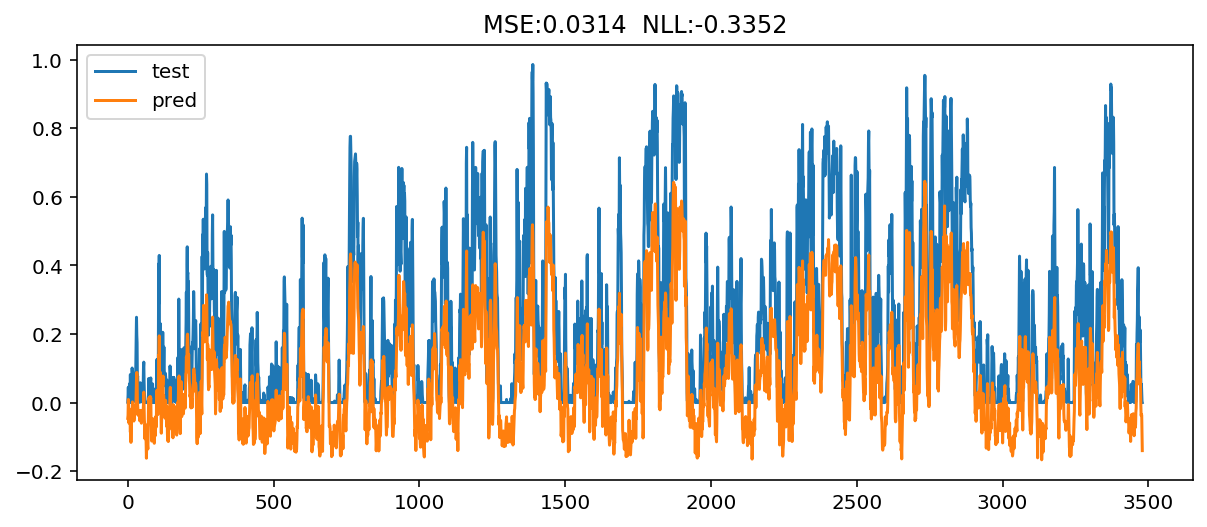

In [5]:
Y_pred = model_test(Base=lasso_learner(alpha=0.01),
           n_estimators=500, verbose_eval=100, Score=CRPS,
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'lasso_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## linear_svr_learner

NGBRegressor(Base=LinearSVR(C=0.05, dual=True, epsilon=0.0, fit_intercept=True,
                            intercept_scaling=1.0, loss='epsilon_insensitive',
                            max_iter=1000, random_state=None, tol=0.0001,
                            verbose=0),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0536 val_loss=0.0000 scale=1.0000 norm=0.5406
[iter 100] loss=-0.2488 val_loss=0.0000 scale=0.2500 norm=0.1250
[iter 200] loss=-0.2949 val_loss=0.0000 scale=0.0625 norm=0.0299
[iter 300] loss=-0.3011 val_loss=0.0000 scale=0.0312 norm=0.0145
[iter 400] loss=-0.3017 val_loss=0.0000 scale=0.0078 norm=0.0036

Test MSE 0.02228136666658328
Test NLL -0.390679135676004


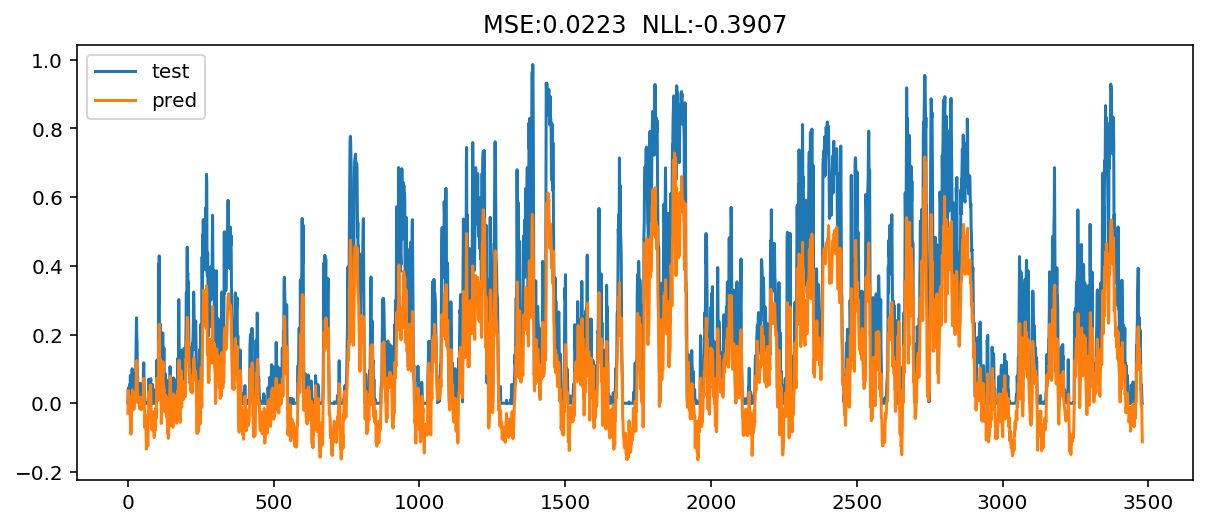

In [6]:
Y_pred = model_test(Base=linear_svr_learner(epsilon=0.0, 
                                   C=0.05, 
                                   max_iter=10000),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=100,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'linear_svr_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## kernel_ridge_learner

NGBRegressor(Base=KernelRidge(alpha=0.5, coef0=1, degree=3, gamma=None,
                              kernel='poly', kernel_params=None),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=10) 

[iter 0] loss=0.0536 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 10] loss=-0.0549 val_loss=0.0000 scale=0.5000 norm=0.2308
[iter 20] loss=-0.1173 val_loss=0.0000 scale=0.5000 norm=0.2160
[iter 30] loss=-0.1631 val_loss=0.0000 scale=0.5000 norm=0.2104
[iter 40] loss=-0.2011 val_loss=0.0000 scale=0.5000 norm=0.2093
[iter 50] loss=-0.2344 val_loss=0.0000 scale=0.5000 norm=0.2105
[iter 60] loss=-0.2525 val_loss=0.0000 scale=0.2500 norm=0.1059
[iter 70] loss=-0.2667 val_loss=0.0000 scale=0.2500 norm=0.1065
[iter 80] loss=-0.2799 val_loss=0.0000 scale=0.2500 norm=0.1071
[iter 90] loss=-0.2922 val_lo

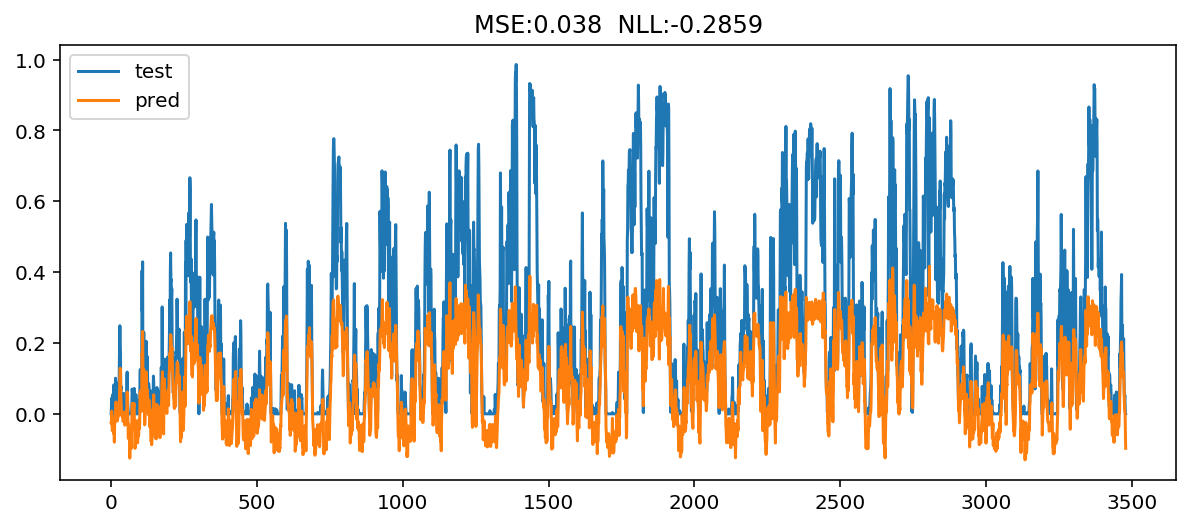

In [7]:
Y_pred = model_test(Base=kernel_ridge_learner(alpha=0.5, 
                                    kernel="poly",
                                    degree=3),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'kernel_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## esn_ridge_learner

NGBRegressor(Base=<ngboost.esn_learners.ESN_Ridge_learner object at 0x1a205ada20>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=10) 

[iter 0] loss=0.0536 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 10] loss=-0.0556 val_loss=0.0000 scale=0.5000 norm=0.2293
[iter 20] loss=-0.1173 val_loss=0.0000 scale=0.5000 norm=0.2136
[iter 30] loss=-0.1619 val_loss=0.0000 scale=0.5000 norm=0.2070
[iter 40] loss=-0.1979 val_loss=0.0000 scale=0.5000 norm=0.2048
[iter 50] loss=-0.2214 val_loss=0.0000 scale=0.2500 norm=0.1024
[iter 60] loss=-0.2358 val_loss=0.0000 scale=0.2500 norm=0.1026
[iter 70] loss=-0.2493 val_loss=0.0000 scale=0.2500 norm=0.1029
[iter 80] loss=-0.2618 val_loss=0.0000 scale=0.2500 norm=0.1032
[iter 90] loss=-0.2733 val_loss=0.0000 scale=0.2500 norm=0.1035
[iter 100] loss=-0.2

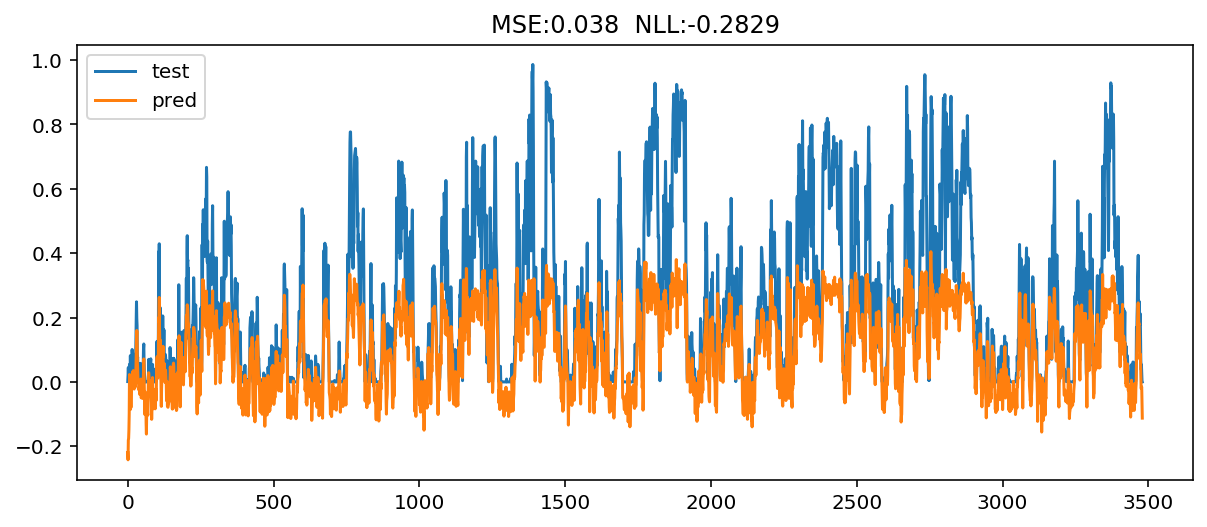

In [8]:
Y_pred = model_test(Base=esn_ridge_learner(n_readout=1000,
                                  n_components=100,
                                  alpha=0.01),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## esn_kernel_ridge_learner

NGBRegressor(Base=<ngboost.esn_learners.ESN_kernel_ridge_learner object at 0x1a205de278>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=5) 

[iter 0] loss=0.0536 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 5] loss=-0.0064 val_loss=0.0000 scale=0.5000 norm=0.2486
[iter 10] loss=-0.0503 val_loss=0.0000 scale=0.5000 norm=0.2354
[iter 15] loss=-0.0852 val_loss=0.0000 scale=0.5000 norm=0.2270
[iter 20] loss=-0.1144 val_loss=0.0000 scale=0.5000 norm=0.2214
[iter 25] loss=-0.1398 val_loss=0.0000 scale=0.5000 norm=0.2181
[iter 30] loss=-0.1624 val_loss=0.0000 scale=0.5000 norm=0.2162
[iter 35] loss=-0.1832 val_loss=0.0000 scale=0.5000 norm=0.2153
[iter 40] loss=-0.2022 val_loss=0.0000 scale=0.5000 norm=0.2151
[iter 45] loss=-0.2199 val_loss=0.0000 scale=0.5000 norm=0.2154
[iter 50] loss=

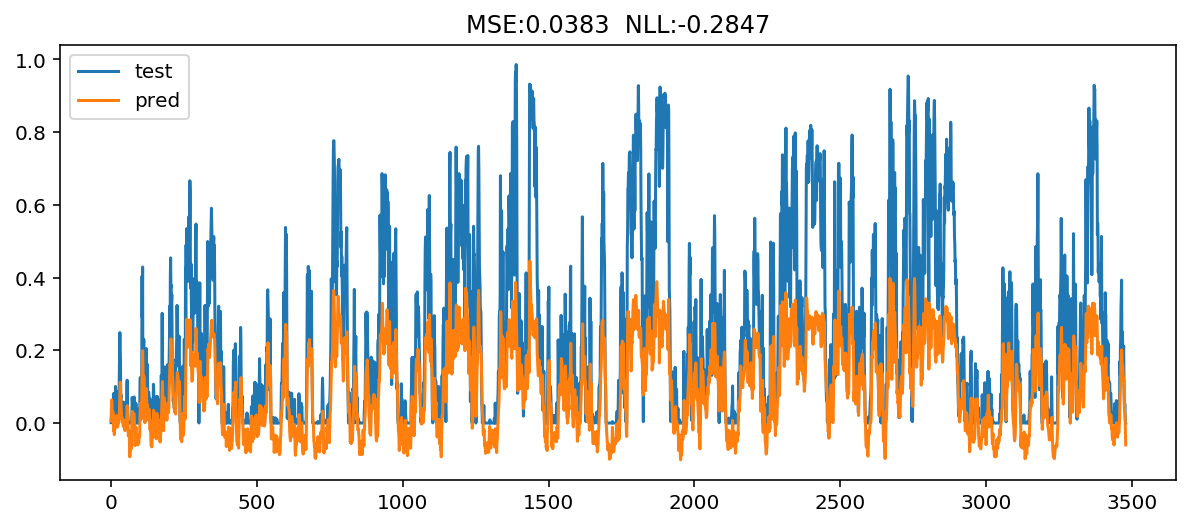

In [9]:
Y_pred = model_test(Base=esn_kernel_ridge_learner(n_readout=1000,
                                         n_components=100,
                                         alpha=1, 
                                         kernel='poly',
                                         degree=3),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=5,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_kernel_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## esn_linear_svr_learner

NGBRegressor(Base=<ngboost.esn_learners.ESN_linear_svr_learner object at 0x108504cc0>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=10) 

[iter 0] loss=0.0536 val_loss=0.0000 scale=1.0000 norm=0.5406
[iter 10] loss=-0.0274 val_loss=0.0000 scale=0.5000 norm=0.2461
[iter 20] loss=-0.0815 val_loss=0.0000 scale=0.5000 norm=0.2347


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[iter 30] loss=-0.1247 val_loss=0.0000 scale=0.5000 norm=0.2289
[iter 40] loss=-0.1603 val_loss=0.0000 scale=0.5000 norm=0.2268
[iter 50] loss=-0.1819 val_loss=0.0000 scale=0.2500 norm=0.1134
[iter 60] loss=-0.1958 val_loss=0.0000 scale=0.2500 norm=0.1136
[iter 70] loss=-0.2088 val_loss=0.0000 scale=0.2500 norm=0.1138
[iter 80] loss=-0.2206 val_loss=0.0000 scale=0.2500 norm=0.1142
[iter 90] loss=-0.2311 val_loss=0.0000 scale=0.2500 norm=0.1146
[iter 100] loss=-0.2397 val_loss=0.0000 scale=0.2500 norm=0.1150
[iter 110] loss=-0.2450 val_loss=0.0000 scale=0.1250 norm=0.0576
[iter 120] loss=-0.2492 val_loss=0.0000 scale=0.1250 norm=0.0577
[iter 130] loss=-0.2531 val_loss=0.0000 scale=0.1250 norm=0.0577
[iter 140] loss=-0.2567 val_loss=0.0000 scale=0.1250 norm=0.0578
[iter 150] loss=-0.2600 val_loss=0.0000 scale=0.1250 norm=0.0578
[iter 160] loss=-0.2630 val_loss=0.0000 scale=0.1250 norm=0.0578
[iter 170] loss=-0.2658 val_loss=0.0000 scale=0.1250 norm=0.0578
[iter 180] loss=-0.2680 val_loss

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[iter 220] loss=-0.2726 val_loss=0.0000 scale=0.0625 norm=0.0288
[iter 230] loss=-0.2735 val_loss=0.0000 scale=0.0625 norm=0.0288


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[iter 240] loss=-0.2743 val_loss=0.0000 scale=0.0625 norm=0.0288
[iter 250] loss=-0.2750 val_loss=0.0000 scale=0.0625 norm=0.0287


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[iter 260] loss=-0.2755 val_loss=0.0000 scale=0.0312 norm=0.0144
[iter 270] loss=-0.2759 val_loss=0.0000 scale=0.0625 norm=0.0287
[iter 280] loss=-0.2762 val_loss=0.0000 scale=0.0312 norm=0.0143
[iter 290] loss=-0.2765 val_loss=0.0000 scale=0.0312 norm=0.0143
[iter 300] loss=-0.2768 val_loss=0.0000 scale=0.0312 norm=0.0143
[iter 310] loss=-0.2770 val_loss=0.0000 scale=0.0312 norm=0.0143
[iter 320] loss=-0.2772 val_loss=0.0000 scale=0.0312 norm=0.0143
[iter 330] loss=-0.2774 val_loss=0.0000 scale=0.0312 norm=0.0143
[iter 340] loss=-0.2775 val_loss=0.0000 scale=0.0156 norm=0.0071
[iter 350] loss=-0.2776 val_loss=0.0000 scale=0.0312 norm=0.0142
[iter 360] loss=-0.2777 val_loss=0.0000 scale=0.0156 norm=0.0071
[iter 370] loss=-0.2777 val_loss=0.0000 scale=0.0156 norm=0.0071
[iter 380] loss=-0.2778 val_loss=0.0000 scale=0.0156 norm=0.0071
[iter 390] loss=-0.2778 val_loss=0.0000 scale=0.0312 norm=0.0142
[iter 400] loss=-0.2779 val_loss=0.0000 scale=0.0020 norm=0.0009
[iter 410] loss=-0.2779 v

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[iter 450] loss=-0.2780 val_loss=0.0000 scale=0.0156 norm=0.0071
[iter 460] loss=-0.2781 val_loss=0.0000 scale=0.0156 norm=0.0071
[iter 470] loss=-0.2781 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 480] loss=-0.2781 val_loss=0.0000 scale=0.0078 norm=0.0035
[iter 490] loss=-0.2781 val_loss=0.0000 scale=0.0078 norm=0.0035

Test MSE 0.03521229848127299
Test NLL -0.31523119881622824


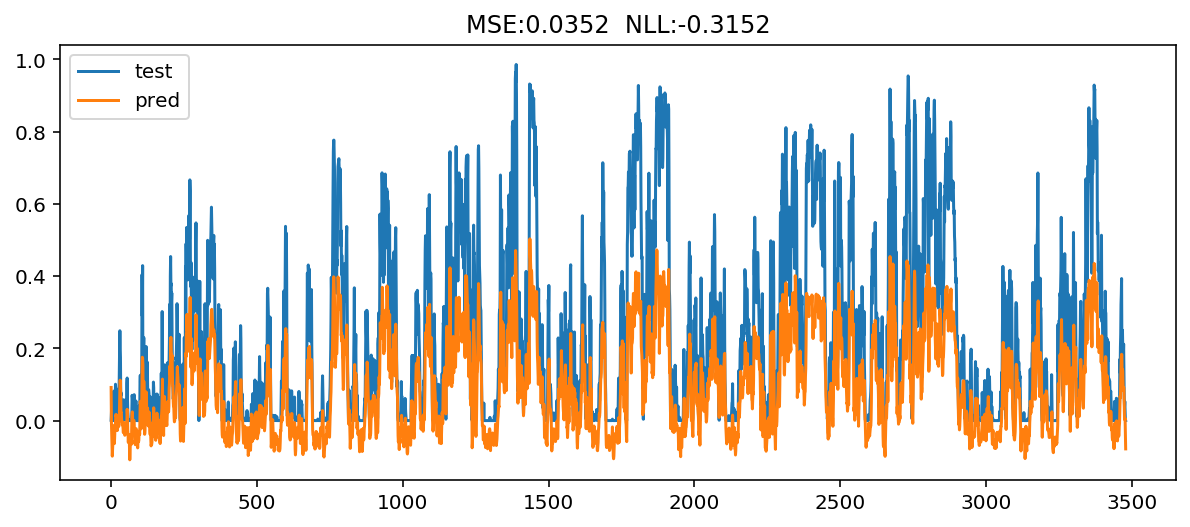

In [10]:
Y_pred = model_test(Base=esn_linear_svr_learner(n_readout=1000,
                                         n_components=100,
                                         epsilon=0.0,
                                         C=0.02,
                                         max_iter=1000),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_linear_svr_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

In [12]:
Pred_df.to_csv('/Users/apple/Documents/ML_Project/ML - 2.1/result/'+transform+'-3.csv')